<a href="https://colab.research.google.com/github/mohammadsanatabassum/labs-and-projects-on-aiml-/blob/main/statistics_and_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# statistics and probability fundamentals


In [53]:
def toss_coin(number_of_tosses=500):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=500):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [54]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Heads    265
Tails    235
Name: count, dtype: int64


In [7]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

def toss_coin(number_of_tosses=200):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=200):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [9]:
results = pd.Series([np.sum(toss_coin(30) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [10]:
# problems


If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.


# solution
 There are 9 distinct numbered cards (2 through 10), and each card appears in 4 suits (Spades, Hearts, Diamonds, Clubs). Therefore, the total number of numbered cards is:
9×4=36
9×4=36

The total number of cards in the deck is 52.

Thus, the probability of drawing a numbered card is:
P(numbered card)=36/52=9/13



In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.



#solution
From the previous result, we know that the probability of drawing a numbered card on a single draw is 9/13​.

Thus, the probability of drawing two numbered cards (with replacement) is:
P(both draws are numbered)=P(numbered on first)×P(numbered on second)=9/13×9/13=81/169


So, the probability that both cards are numbered cards is 81/169.



 Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.

# solution
The overall probability of drawing two numbered cards (without replacement) is the product of the probabilities of each draw:
P(both numbered cards)=P(numbered card on first draw)×P(numbered card on second draw)=9/13×35/51=315/663=105/221


So, the probability that both cards drawn are numbered cards (without replacement) is 105/221

Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.

# solution
Since the cut is made at a random position, each of the 52 cards has an equal probability of being at the bottom of the cut. Therefore, the probability that the card at the bottom of your cut is a numbered card is:
P(numbered card)=Number of numbered cardsTotal cards=36/52=913


So, the probability that the bottom card of your cut is a numbered card is 9/13.

Binomial distribution

In [12]:
from scipy.stats import binom

In [13]:
binom.pmf(k=15, n=10, p=0.75)

0.0

In [14]:
1 - binom.pmf(k=24, n=15, p=0.75) - binom.pmf(k=5, n=15, p=0.75)

0.9993203869089484

In [15]:
binom.cdf(13, n=15, p=0.75)

0.9198192339390516

Normal distribution

In [16]:
from scipy.stats import norm

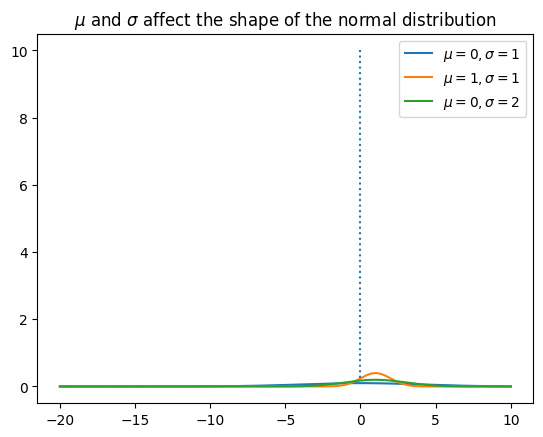

In [17]:
x = np.linspace(-20, 10, 200)
f1 = norm.pdf(x, loc=0, scale=4)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=1, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=10, ymax=0.25, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [18]:
norm.cdf(20)

1.0

In [19]:
norm.ppf(0.75)

0.6744897501960817

Poisson distribution

In [20]:
from scipy.stats import poisson

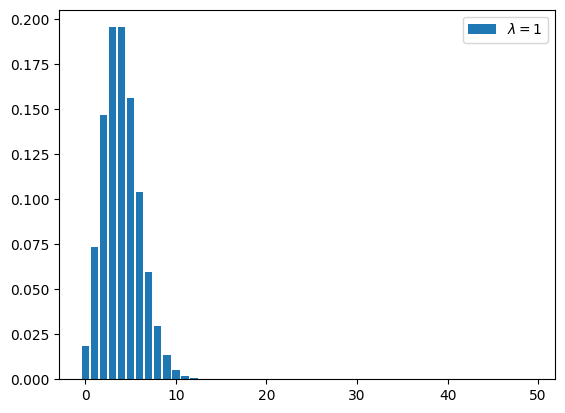

In [21]:
x = np.arange(50)
f1 = poisson.pmf(x, mu=4)
f2 = poisson.pmf(x, mu=22)
f3 = poisson.pmf(x, mu=32)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

In [22]:
x @ f1

3.9999999999999982

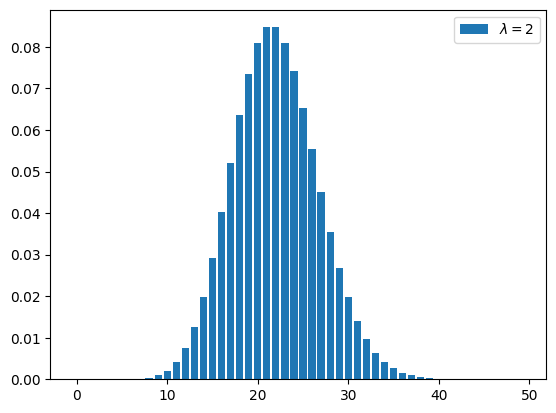

In [23]:
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [24]:
x @ f3

31.900438767849828

In [25]:
poisson.pmf(3, 5)

0.1403738958142805

Central Limit Theorem

In [26]:
from scipy.stats import poisson

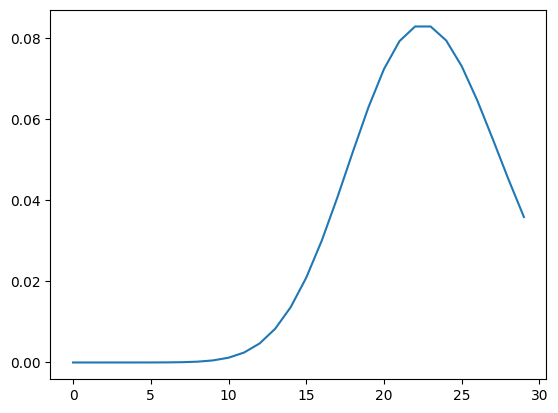

In [27]:
bins = np.arange(0, 30)
p_pois = poisson.pmf(bins, mu=23)
plt.plot(bins, p_pois)

(array([ 1.,  5., 11., 26., 34., 55., 37., 21.,  9.,  1.]),
 array([18.66666667, 19.48333333, 20.3       , 21.11666667, 21.93333333,
        22.75      , 23.56666667, 24.38333333, 25.2       , 26.01666667,
        26.83333333]),
 <BarContainer object of 10 artists>)

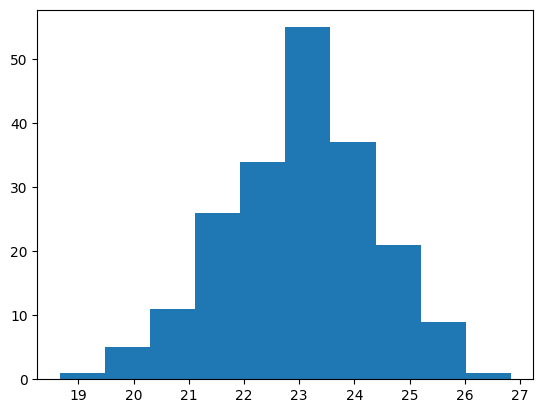

In [28]:
def sample_pois(_):
    samples = poisson.rvs(mu=23, size=12)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(200)))
plt.hist(means)